# Function 2 - Optimising Noisy Models  
This corresponds to trying to optimise an unknown machine learning model. However, the initialization of the model is very important, meaning your observations will be very noisy, and the problem might have a lot of local optima! You are trying to make the model’s log-likelihood as large as possible.


In [1]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process.kernels import Matern
import matplotlib.pyplot as plt
%matplotlib inline

f1_inp = np.load("./../function_2/initial_inputs.npy")
f1_out = np.load("./../function_2/initial_outputs.npy")
f1_out

file2_inp = np.load("./../../initial_data2/function_2/initial_inputs.npy")
file2_out = np.load("./../../initial_data2/function_2/initial_outputs.npy")

f1_inp = np.concatenate((f1_inp, file2_inp))
f1_out = np.concatenate((f1_out, file2_out))

q1_inp = [0.125028, 0.706016]
q1_out = [0.11611401708527386]

q2_inp = [0.754418, 0.963375]
q2_out = [0.32222650104621703]


q3_inp = [0.757994, 0.737195]
q3_out = [0.31748997890343916]

q4_inp = [0.777398, 0.976694]
q4_out = [0.14609621294552494]

q5_inp = [0.782977, 0.109445]
q5_out = [0.16210713156719259]

q6_inp = [0.767318, 0.923609]
q6_out = [0.11319863108963732]


q7_inp = [0.770426, 0.40673]
q7_out = [0.26647971761340156]

q8_inp = [0.783859, 0.484165]
q8_out = [0.06719836257804361]

q9_inp = [0.513717, 0.954085]
q9_out = [0.09673682242051501]

q10_inp = [0.800505, 0.431772]
q10_out = [-0.01277084857252845]




q11_inp = [0.777789, 0.601875]
q11_out = [0.07680257214846967]



q12_inp = [0.702636, 0.448018]
q12_out = [0.5642220109002406]

q13_inp = [0.732733, 0.439018]
q13_out = [0.4157764338207558]

f1_inp = np.vstack((f1_inp, q1_inp, q2_inp, q3_inp, q4_inp, q5_inp,q6_inp,q7_inp,q8_inp,q9_inp,q10_inp,q11_inp,q12_inp,q13_inp))
f1_out = np.append(f1_out, [q1_out, q2_out,q3_out, q4_out, q5_out,q6_out,q7_out,q8_out,q9_out,q10_out,q11_out,q12_out,q13_out])
f1_inp, f1_out
max(f1_out), np.mean(f1_out)

len(f1_inp), len(f1_out)

max(f1_out)         

np.float64(0.6948320857901906)

In [4]:
y_idx_max = np.argmax(f1_out)

y_max = f1_out[y_idx_max]
x_max = f1_inp[y_idx_max]
x_max, y_max

(array([0.7227338 , 0.43801822]), np.float64(0.6948320857901906))

In [3]:
# toptop

# Exploratory Data Analysis (EDA) for Bayesian Optimization 

## **Objective**
The goal of the Exploratory Data Analysis (EDA) is to investigate the characteristics of the input-output relationships, data quality, and patterns that influence the performance of Bayesian Optimization. This analysis will help guide the selection of kernel parameters, acquisition functions, and input transformations to optimize model performance and robustness.


1. **Data Quality**  
   - Identify outliers via z-scores or IQR (ensures kernel parameters aren’t distorted by extreme values, example an outlier can create unrealistic length scales or amplitude of kernel parameters). Consider removing or transforming them.
   - Check for missing/null values and decide on imputation or removal (helps avoid skewing the GP’s fit). Remove duplicates if there is any  (prevents overemphasis on certain points).  


2. **Data Distribution**  
   - Plot histograms to spot skewness (so we can apply tansfromation of input and output), to address heteroscedascity.  
   - Analyse need to standarise features (kernels like RBF, Matern rely on distance metrics,If features have different scales (e.g., 0–1 vs. 1–10,000), larger ranges dominate distance calculations, distorting kernel behavior).
    - Check, variance, skewnes which can be needed in further steps

3. **Input-Output Relationships**  
   - Use correlation matrices to find strong or weak drivers of the target (remove features that are not relevant and add noise to the data).  
   - Visualize scatter/surface plots (reveals potential nonlinearity or interactions for better GP modeling).
   

6. **Noise and Uncertainty**  
    - Analyze residuals from a baseline model to gauge data noise (ensures an appropriate noise term in the GP).  
    - Estimate signal-to-noise ratio (prevents overfitting and reflects realistic uncertainty).
    - Consider removing  as the step above if it removes the noise 
     - If skewness is low but variance is high in RESIDUALS, focus on adding a noise term to the kernel, reults from step 2
7. **Feature Engineering**  
   - Apply dimensionality reduction (e.g., PCA) if many correlated features (simplifies model, reduces noise).  
   - Assess feature importance (e.g., SHAP) to prioritize critical inputs (focuses GP where it matters).
   

4. **Kernel Suitability Exploration,  Bounds and Feature Ranges**  
   - Amplitdue, check variance on ouput
   - Lengthscle check variance on input
   - Determine min-max bounds for each feature (the kernel in GP defines the relationship between features and their similarity, typically extends a bit further to avoid extraplotation, but not too far to avoid underfiting).  
   - Select length-scale according to how fast data changes (short for abrupt variation, longer for smoother patterns). 
   - Match kernel amplitude to output variance (captures overall scale of the data).  
   - Check Residual variance/ noise, when its high nise, wider bounds, low noise tigheter bounds 

8. **Acquisition Function Behavior**  
   - Monitor exploration-exploitation trade-offs (e.g., EI, PI, UCB) to ensure effective sampling (speeds convergence).  
   - Adjust parameters like \(\beta\) or \(\xi\) to fine-tune that balance (enhances optimization efficiency).


9. **Iterative Refinement**  
   - Revisit EDA after initial Bayesian runs (refine kernel hyperparameters, acquisition settings).  
   - Visualize updated surfaces and residuals (validates improvements and ensures robust GP performance).


In [5]:
from scipy.stats import skew 

pd_inp = pd.DataFrame(f1_inp)
pd_out = pd.DataFrame(f1_out, columns=["Output"])


pd_inp.describe()
pd_out.describe()

pd_inp.isnull().sum()  # No null on input 0 , 1 are the columns 
pd_out.isnull().sum()  # No null on output
sum(pd_inp.duplicated())   # 0 duplicates
sum(pd_out.duplicated())   # 0 duplicates

0

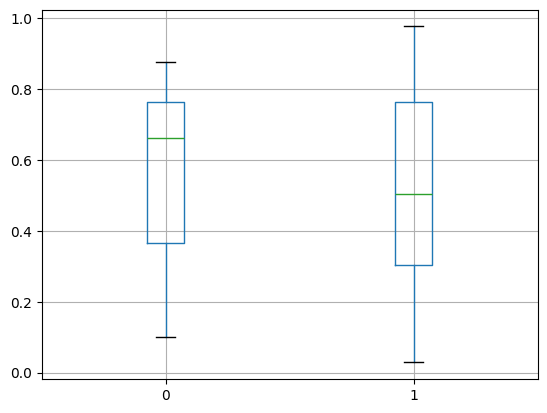

In [6]:
## Checking for outliers

pd_inp.boxplot() # No outliers second feature more spread, need to standarise features, so it fits kernel, if Matern, RBA
plt.show()

<Axes: >

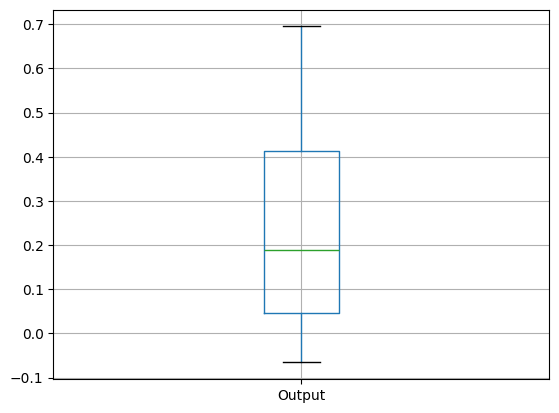

In [7]:
pd_out.boxplot() # No outliers 

## Distribution 

(array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
       dtype=object),
 array([[<Axes: title={'center': 'Output'}>]], dtype=object))

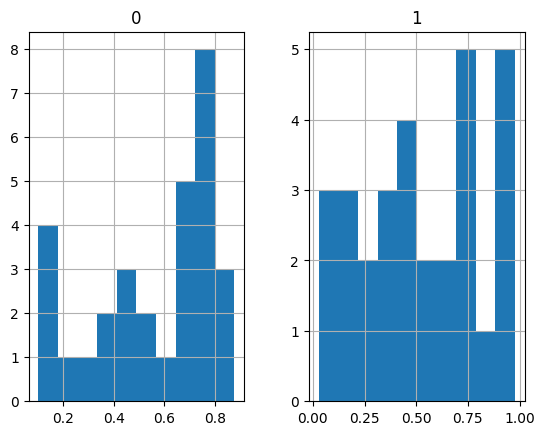

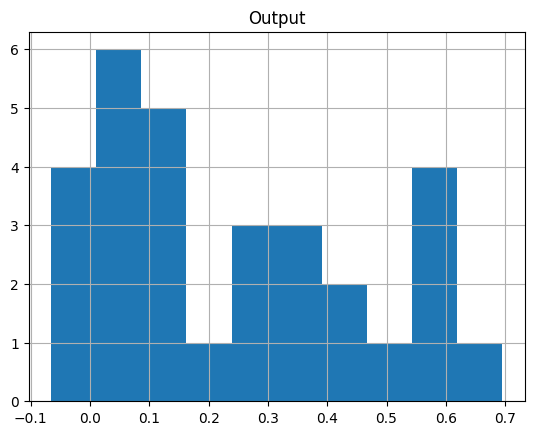

In [8]:
pd_inp.hist(), pd_out.hist()

In [9]:
skew(f1_inp),skew(f1_out)
np.var(f1_inp),np.var(f1_out)



(np.float64(0.07098029769885775), np.float64(0.04895755830721404))

# Input/Output Relationship Analysis 

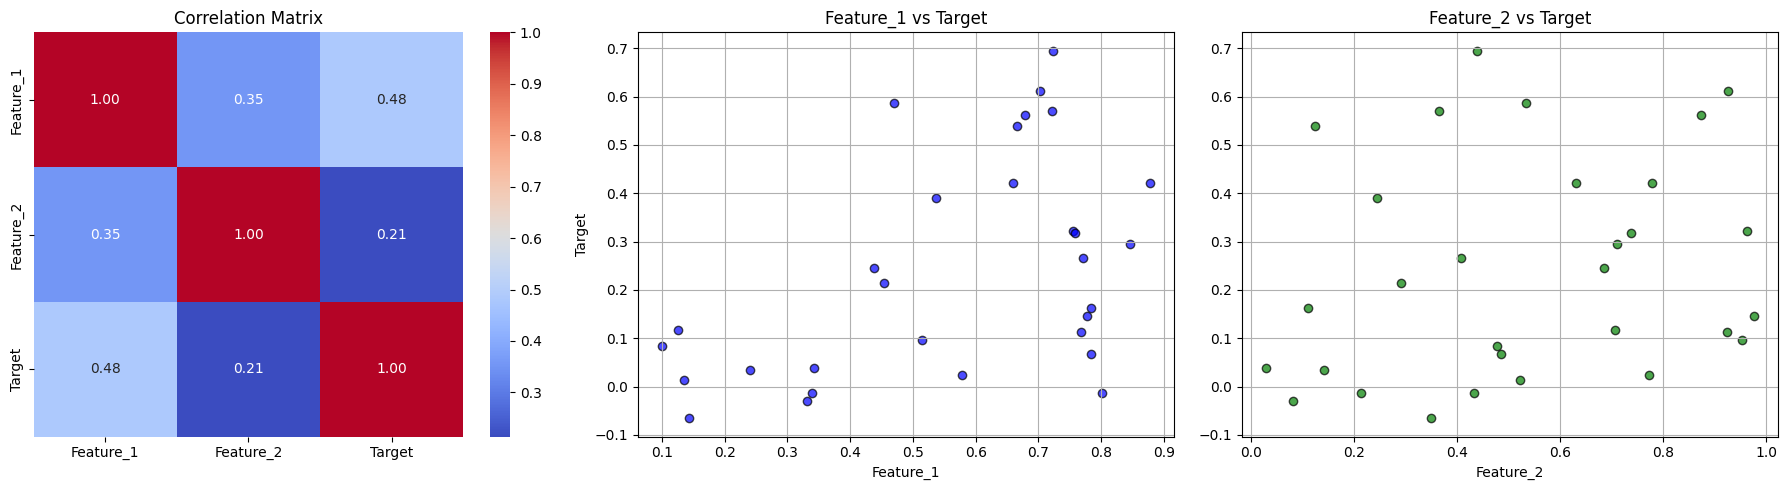

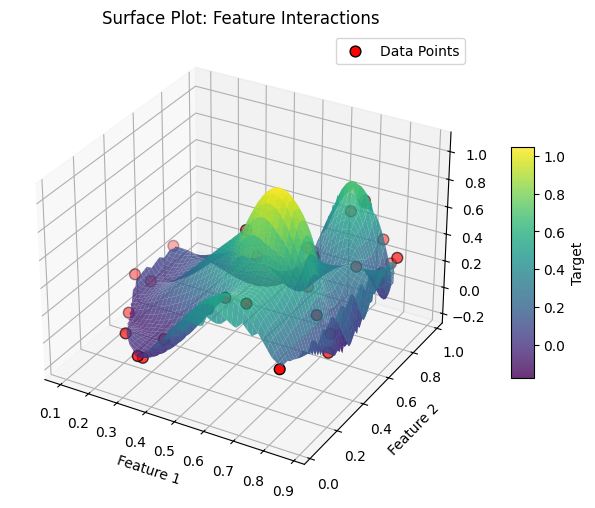

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import seaborn as sns

# Ensure f1_out is 1D
f1_out = f1_out.ravel()

# Create a figure for the inline plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# **1. Correlation Matrix**
# Convert f1_inp and f1_out to a single NumPy array for correlation
data = np.hstack((f1_inp, f1_out.reshape(-1, 1)))

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(data.T)

# Plot correlation heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f",
    xticklabels=[f"Feature_{i+1}" for i in range(f1_inp.shape[1])] + ["Target"],
    yticklabels=[f"Feature_{i+1}" for i in range(f1_inp.shape[1])] + ["Target"],
    ax=axes[0]
)
axes[0].set_title("Correlation Matrix")

# **2. Scatter Plot: Feature 1 vs Target**
axes[1].scatter(f1_inp[:, 0], f1_out, color="blue", alpha=0.7, edgecolor="k")
axes[1].set_xlabel("Feature_1")
axes[1].set_ylabel("Target")
axes[1].set_title("Feature_1 vs Target")
axes[1].grid(True)

# **3. Scatter Plot: Feature 2 vs Target (if exists)**
if f1_inp.shape[1] > 1:
    axes[2].scatter(f1_inp[:, 1], f1_out, color="green", alpha=0.7, edgecolor="k")
    axes[2].set_xlabel("Feature_2")
#     axes[2].set_ylabel("Target")
    axes[2].set_title("Feature_2 vs Target")
    axes[2].grid(True)
else:
    axes[2].axis("off")
    axes[2].set_title("Feature_2 vs Target (Not Available)")

plt.tight_layout()
plt.show()





# ---------------**3D Surface Plot (Separate Block for Feature Interaction)**
#if f1_inp.shape[1] == 2:  # Ensure input is 2D
x, y = f1_inp[:, 0], f1_inp[:, 1]
z = f1_out

# Create grid points for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 100),
    np.linspace(y.min(), y.max(), 100)
)

# Interpolate the Z values for the grid
grid_z = griddata(
    (x, y), z, 
    (grid_x, grid_y), 
    method="cubic"
)

  # This visual can be good for function 1 to identify the two local minimas   
#     # Handle potential issues with NaN values in grid_z
#     if np.isnan(grid_z).any():
#         grid_z = np.nan_to_num(grid_z)  # Replace NaNs with zeros or interpolated values

# Plotting the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    grid_x, grid_y, grid_z, 
    cmap="viridis", 
    edgecolor="none", 
    alpha=0.8
)
# Scatter points (data points)
ax.scatter(x, y, z, color='red', edgecolor='black', s=60, label="Data Points")
ax.legend(loc="best")  # Add legend for clarity

cb = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cb.set_label("Target")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
#     ax.set_zlabel("Target")
plt.title("Surface Plot: Feature Interactions")
plt.show()
# else:
#     print("Surface plot requires exactly 2 features in the input data.")
    
    
# The red on the 3d surface plot its just to make the plot easier to see


### Conclusion about input/ouput relationship
- There is a stornger correlence between feature One and the output
- 2 LOCAL Optimas




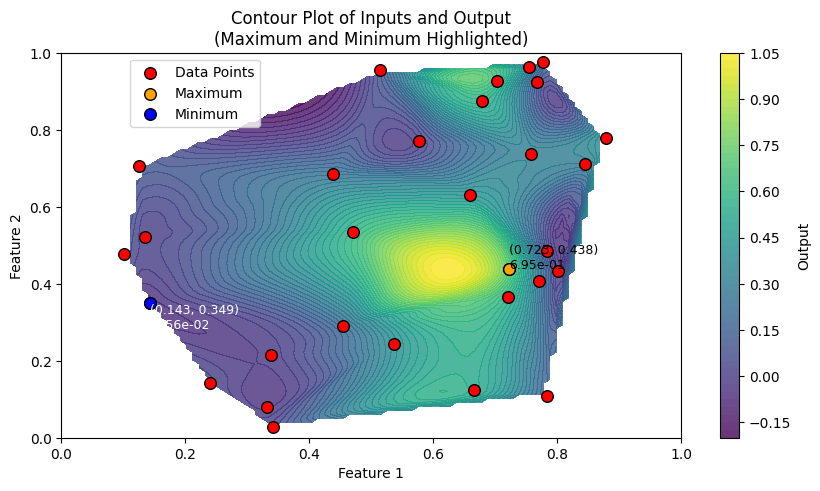

Max: 6.95e-01 at (0.7227, 0.4380)
Min: -6.56e-02 at (0.1427, 0.3490)


In [11]:

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Identify max/min points
max_idx, min_idx = np.argmax(z), np.argmin(z)
max_x, max_y, max_z = x[max_idx], y[max_idx], z[max_idx]
min_x, min_y, min_z = x[min_idx], y[min_idx], z[min_idx]

# Plot
plt.figure(figsize=(10, 5))
plt.contourf(grid_x, grid_y, grid_z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(label="Output")
plt.scatter(x, y, color='red', edgecolor='black', s=70, label="Data Points")
plt.scatter([max_x], [max_y], color='orange', edgecolor='black', s=70, label="Maximum")
plt.text(max_x, max_y, f"({max_x:.3f}, {max_y:.3f})\n{max_z:.2e}", fontsize=9, color='black')
plt.scatter([min_x], [min_y], color='blue', edgecolor='black', s=70, label="Minimum")
plt.text(min_x, min_y, f"({min_x:.3f}, {min_y:.3f})\n{min_z:.2e}", fontsize=9, color='white',
         ha='left', va='top')
plt.xlabel("Feature 1"), plt.ylabel("Feature 2")
plt.title("Contour Plot of Inputs and Output\n(Maximum and Minimum Highlighted)")
plt.legend()
plt.legend(loc="upper left", bbox_to_anchor=(0.1, 1.0))

plt.show()

print(f"Max: {max_z:.2e} at ({max_x:.4f}, {max_y:.4f})")
print(f"Min: {min_z:.2e} at ({min_x:.4f}, {min_y:.4f})")

- From above we could see that Feature 1 was more correlated with output variable, so we might exepect that to grow on the result of acquistion function

# Analysing Noise and Uncertianty

Noise and Uncertainty
     
    - If skewness is low but variance is high, focus on adding a noise term to the kernel, reults from step 2 
    - Analyze residuals from a baseline model to gauge data noise (ensures an appropriate noise term in the GP).
    - Estimate signal-to-noise ratio (prevents overfitting and reflects realistic uncertainty).
    - If skewness is low but variance is high, focus on adding a noise term to the kernel, reults from step 2
    - Test after you have built the surrogate model, if there are future that just add noise and affect predictions 
- Aim: Follow a data-driven strategy, based on the parameters of the data, to set the inital parameter of the kernel

In [12]:
# Analysing skewnes and variance 




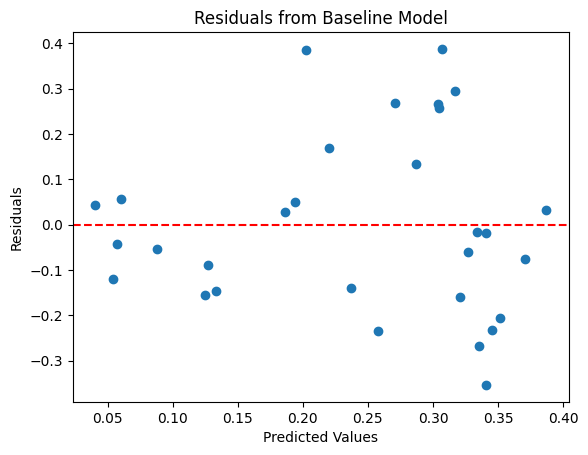

Residual Variance: 0.039
Residual Mean: 0.000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example Data (replace with your data)
x = f1_inp
z = f1_out  # Observed target

# Fit a baseline model (Linear Regression)
model = LinearRegression()
model.fit(x, z)
z_pred = model.predict(x)  # Predictions from the baseline model

# Residuals
residuals = z - z_pred

# Plot Residuals
plt.scatter(z_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals from Baseline Model")
plt.show()

# Print Residual Statistics
print(f"Residual Variance: {np.var(residuals, ddof=1):.3f}")
print(f"Residual Mean: {np.mean(residuals):.3f}")


In [14]:
# Signal Variance (Variance of Predictions)
signal_variance = np.var(z_pred, ddof=1)

# Residual Variance (Variance of Noise)
residual_variance = np.var(residuals, ddof=1)
residual_skewness = skew(residuals)
# Signal-to-Noise Ratio (SNR)
snr = signal_variance / residual_variance

# Display Metrics
print(f"Signal Variance: {signal_variance:.3f}")
print(f"Residual Variance (Noise): {residual_variance:.3f}")
print(f"Residual Skewnes : {residual_skewness:.3f}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.3f}")


Signal Variance: 0.012
Residual Variance (Noise): 0.039
Residual Skewnes : 0.408
Signal-to-Noise Ratio (SNR): 0.306



### Conclusion
- There is some noise in the data, as we have some unexplained variance,
- WhiteKernel noise to be added 

- No PCA Needed as we have only 2 features


# Kernel Parameters Analysis

4. **Kernel Suitability Exploration,  Bounds and Feature Ranges**  
   - Amplitdue, check variance on ouput will match kernel amplitude to output variance (captures overall scale of the data). 
   - Lengthscle check variance on input, will select length-scale according to how fast data changes (short for abrupt variation, longer for smoother patterns). 
   - Determine min-max bounds for each feature (the kernel in GP defines the relationship between features and their similarity, typically extends a bit further to avoid extraplotation, but not too far to avoid underfiting).  
  
   - Check Residual variance/ noise, when its high nise, wider bounds, low noise tigheter bounds 


In [15]:
output_variance = np.var(f1_out, ddof=1)
amplitude_init = np.sqrt(output_variance)
amplitude_init

input_variance = np.var(f1_inp, axis=0, ddof=1)
length_scale_init = np.sqrt(input_variance)
length_scale_init

# Bounds will always be the bounds of the input variable, IMPORTANT TO CHECK FOR OUTLIERS
min_bounds = np.min(f1_inp, axis=0)
max_bounds = np.max(f1_inp, axis=0)

# Extend bounds slightly (10% of range)
range_extension = 0.1 * (max_bounds - min_bounds)
extended_min_bounds = min_bounds - range_extension
extended_max_bounds = max_bounds + range_extension
amplitude_init,length_scale_init,  extended_min_bounds, extended_max_bounds

(np.float64(0.22504610632708144),
 array([0.24226756, 0.29607044]),
 array([ 0.02280697, -0.06610191]),
 array([0.95551681, 1.07149363]))

- Start with the above Amplitude but let the optimizer refine it during training
- Start with the above Lenfthscale but let the optimizer refine it during training

## ****NOTE**** After the above analysis I will skip the INPUT / OUPUT transformation, as the relationship between the features and output seems monotonic and does have variablity 


# ***************************** Output Transformation ******************************* 
- I will use Yeo-Johnson method to hanlde the heteroscedastic nature of the data, tranform outputs, and fic asymmetric skewness. 
- Reason I am using Yeo-Johnson is because we have positive and negative values as ouput 



[ 1.34732461  0.81217149 -1.38525265  0.24003329 -0.11713535 -0.98424139
  0.01688959 -0.91354079 -1.15129633  1.67367342 -1.22404509 -0.71300798
  1.44741883 -1.02775779  0.67368423  0.81864313  1.56408303  1.48541169
  2.05162483 -0.93605221 -0.56388988  0.36763492  0.34622822 -0.42838543
 -0.35602413 -0.57706596  0.11568749 -0.78496405 -0.65146506 -1.14638468]


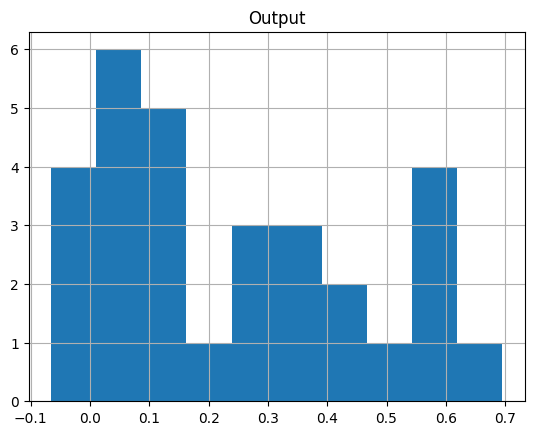

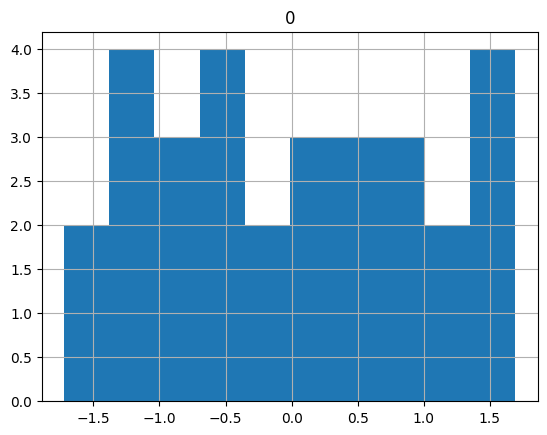

In [16]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Assuming f1_out is a NumPy array or a pandas Series
f1_out_transformed = PowerTransformer(method='yeo-johnson').fit_transform(f1_out.reshape(-1, 1))
out_trans = pd.DataFrame(f1_out_transformed)
pd_out.hist(), out_trans.hist()

f1_out, f1_out_transformed

# Standardization (Z-score Normalization)
f1_mean = np.mean(f1_out)
f1_std = np.std(f1_out)

f1_out_standardized = (f1_out - f1_mean) / f1_std  # Z-score transformation

print(f1_out_standardized)  # Standardized output


###### Checking if the tranformation is now gaussian 


Shapiro-Wilk Test: Stat=0.9482, p-value=0.1509
Kolmogorov-Smirnov Test: Stat=0.1907, p-value=0.1980
Anderson-Darling Test: Stat=0.4823, Critical Values=[0.521 0.593 0.712 0.83  0.988]
D'Agostino K² Test: Stat=6.5841, p-value=0.0372
⚠ f1_out_transformed is NOT Gaussian (Reject Normality)


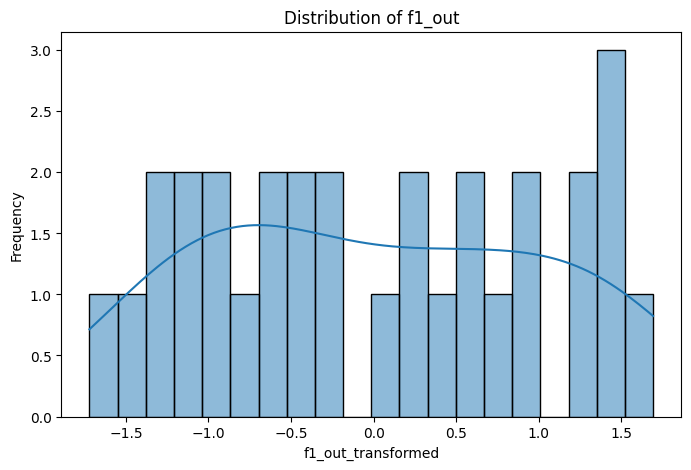

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, anderson, normaltest, kstest
f1_out_transformed = f1_out_transformed.squeeze()


# Convert to Pandas DataFrame
df = pd.DataFrame({'f1_out_transformed': np.array(f1_out_transformed).flatten()})


# === Normality Tests ===
# 1️⃣ Shapiro-Wilk Test
shapiro_stat, shapiro_p = shapiro(f1_out_transformed)
print(f"Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# 2️⃣ Kolmogorov-Smirnov (KS) Test
ks_stat, ks_p = kstest(f1_out_transformed, 'norm', args=(np.mean(f1_out), np.std(f1_out_transformed)))
print(f"Kolmogorov-Smirnov Test: Stat={ks_stat:.4f}, p-value={ks_p:.4f}")

# 3️⃣ Anderson-Darling Test
anderson_result = anderson(f1_out_transformed, dist='norm')
print(f"Anderson-Darling Test: Stat={anderson_result.statistic:.4f}, Critical Values={anderson_result.critical_values}")

# 4️⃣ D'Agostino K² Test
dagostino_stat, dagostino_p = normaltest(f1_out_transformed)
print(f"D'Agostino K² Test: Stat={dagostino_stat:.4f}, p-value={dagostino_p:.4f}")

# 📌 Decision Rule:
alpha = 0.05  # 5% significance level
if shapiro_p < alpha or ks_p < alpha or dagostino_p < alpha:
    print("⚠ f1_out_transformed is NOT Gaussian (Reject Normality)")
else:
    print("✅ f1_out_transformed appears Gaussian (Fail to Reject Normality)")

# === Plot Distribution ===
plt.figure(figsize=(8, 5))
sns.histplot(df['f1_out_transformed'], kde=True, bins=20)
plt.xlabel("f1_out_transformed")
plt.ylabel("Frequency")
plt.title("Distribution of f1_out")
plt.show()


# ************************** Input Transformation************************** 
- #### First I will use the Kumaraswammy Cumulative Distribution Function to addres:

- Non Stationary nature of the function, the way way the patter in the data changes over the unput space, example, rapidly grows in some regions and slower in some other regions 
- I will use the CDF and finds its best parameters by minimising NLML(Negative Log Marginal Likelyhood)

In [18]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel as C, WhiteKernel
from scipy.optimize import minimize

from sklearn.preprocessing import MinMaxScaler

# Normalize the input
scaler = MinMaxScaler()
f1_inp_normalized = scaler.fit_transform(f1_inp)
np.std(f1_inp_normalized), np.std(f1_inp)
skew(f1_inp_normalized), skew(f1_inp)
f1_inp_normalized

array([[0.72725742, 0.10049766],
       [1.        , 0.79106827],
       [0.05425003, 0.33787834],
       [0.95816633, 0.71985783],
       [0.45559423, 0.27611655],
       [0.61392733, 0.78404892],
       [0.4343901 , 0.69232396],
       [0.31034321, 0.        ],
       [0.30635298, 0.19532727],
       [0.7746509 , 0.94712025],
       [0.29731838, 0.05464303],
       [0.        , 0.47352245],
       [0.74286688, 0.89135986],
       [0.04428779, 0.51947456],
       [0.56174754, 0.22786679],
       [0.71867445, 0.63496435],
       [0.47592844, 0.53277692],
       [0.79853722, 0.35423   ],
       [0.80050749, 0.43177438],
       [0.18029378, 0.11870443],
       [0.03151489, 0.71447356],
       [0.84127155, 0.98595037],
       [0.84587234, 0.74736293],
       [0.87083701, 1.        ],
       [0.87801481, 0.08517679],
       [0.85786835, 0.94400294],
       [0.86186702, 0.39876979],
       [0.87914957, 0.4804526 ],
       [0.53159196, 0.97615075],
       [0.90056587, 0.42518551]])

In [19]:
import numpy as np
from scipy.stats import skew
from deap import base, creator, tools, algorithms
import random
from tqdm import tqdm

# Define the warp function as before
def kumaraswamy_warp(X, a, b):
    X_clipped = np.clip(X, 1e-6, 1 - 1e-6)
    return 1 - (1 - X_clipped ** a) ** b

# Objective function
def evaluate(individual):
    a, b = individual
    X_warped = kumaraswamy_warp(f1_inp_normalized, a, b)
    variance = np.var(X_warped)
    skewness = np.mean(np.abs(skew(X_warped, axis=0)))
    return (variance + skewness,)

# Setup DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_a", random.uniform, 0.01, 2.0)
toolbox.register("attr_b", random.uniform, 0.01, 2.0)
toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_a, toolbox.attr_b), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize population
population = toolbox.population(n=50)

# Define number of generations
NGEN = 100
CX_PROB = 0.5
MUT_PROB = 0.2

# Statistics to keep track of progress
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# Run Genetic Algorithm with progress bar
for gen in tqdm(range(NGEN), desc="Genetic Algorithm Generations"):
    offspring = algorithms.varAnd(population, toolbox, cxpb=CX_PROB, mutpb=MUT_PROB)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Extract the best individual
best_ind = tools.selBest(population, k=1)[0]
best_a, best_b = best_ind
best_score = best_ind.fitness.values[0]

# Apply the best warp to the data
f1_inp_warped_best = kumaraswamy_warp(f1_inp_normalized, best_a, best_b)

# Calculate final variance and skewness
final_variance = np.var(f1_inp_warped_best)
final_skewness = np.mean(np.abs(skew(f1_inp_warped_best, axis=0)))

# Display the results
print("\n=== Best Kumaraswamy Parameters (GA) ===")
print(f"a = {best_a:.6f}")
print(f"b = {best_b:.6f}")
print(f"Combined Score (Variance + Skewness) = {best_score:.6f}")
print(f"Final Variance: {final_variance:.6f}")
print(f"Final Skewness: {final_skewness:.6f}")


ModuleNotFoundError: No module named 'deap'

(array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
       dtype=object),
 array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
       dtype=object))

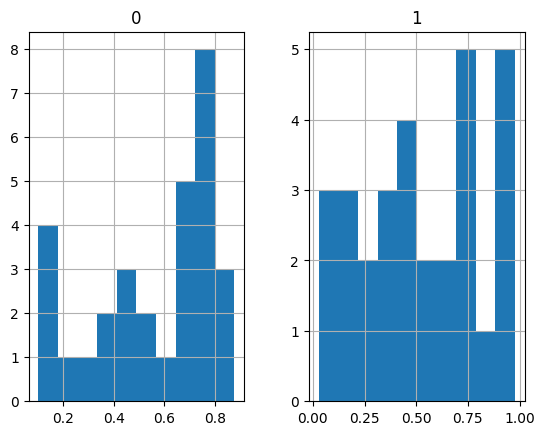

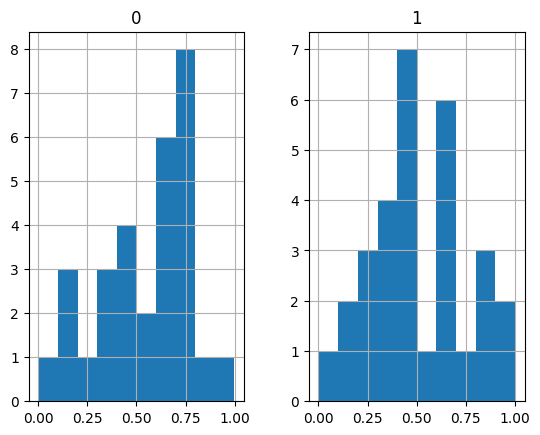

In [20]:
from scipy.stats import skew
# Define the warp function as before
def kumaraswamy_warp(X, a, b):
    X_clipped = np.clip(X, 1e-6, 1 - 1e-6)
    return 1 - (1 - X_clipped ** a) ** b


# Apply CDF on the normalized input using the given parameters
f1_inp_warped = kumaraswamy_warp(f1_inp_normalized, a=0.411047, b=0.468162)

pd_inp_transformed = pd.DataFrame(f1_inp_warped)

pd_inp.hist(), pd_inp_transformed.hist()


# ***************************** Gaussian Process****************************


# Testing Diffrent Kernels 

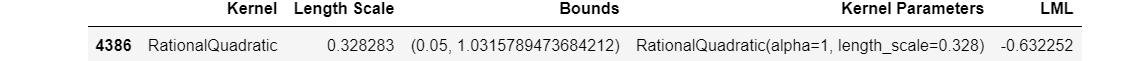
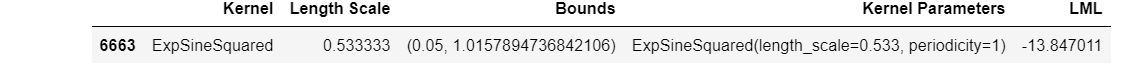
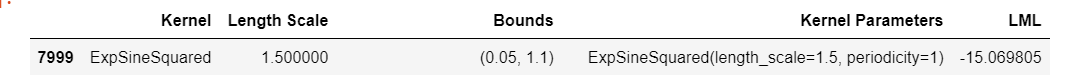


### Rational Quadritic Kernel is having the best score so far
- The good news is with this kernel we do not need to standarise the data as per the below instruction 
- Analyse need to standarise features (kernels like RBF, Matern rely on distance metrics,If features have different scales (e.g., 0–1 vs. 1–10,000),

In [ ]:
# Drop non-numeric columns automatically
results_df_1_cleaned = results_df_1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = results_df_1_cleaned.corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix

# Surprisingly noise levels are not  imapcting LML on kernel
- I will try input/output tranformation

In [132]:
# No transformation for this function 
# For the second query I have decided to transform 

In [23]:
x_final = f1_inp_warped
y_final  = f1_out_transformed

# - Final Kernel 

In [21]:
import numpy as np

# Find the index of the maximum value in y_final
max_index = np.argmax(y_final)

# Get the max value
max_value = y_final[max_index]

# Get the corresponding row in x_final
corresponding_x = x_final[max_index]

# Display results
print("Max of y_final:", max_value)
print("Index of max:", max_index)
print("Corresponding x_final row:", corresponding_x)


Max of y_final: 1.6971372797371482
Index of max: 18
Corresponding x_final row: [0.68050446 0.43808974]


In [ ]:
x_best = np.array([0.68050446 0.43808974])

percent_range = 0.02  # 2% range

# Compute bounds
lower_bounds = np.clip(x_best * (1 - percent_range), 0.0, 1.0)
upper_bounds = np.clip(x_best * (1 + percent_range), 0.0, 1.0)

bounds = list(zip(lower_bounds, upper_bounds))

# Display bounds
print("Refined bounds around best input:")
for i, (low, high) in enumerate(bounds):
    print(f"Feature {i+1}: ({low:.6f}, {high:.6f})")

###### Context 
- Below I am following anotherstrategy where I am tranforming the y and optimising the kernel at the same time, this is giving me a better fit to the data, but also a LML(which was the reason why I decided to investigate a new strategy). 

- I have limited the number of the iteration based on the imporvment on LML to avoid overfiting.
- Important: I tried to optimise simuntaniously y and kernel, however it was not fitting well, so I normalised using the z score, than I fed it to HEBO


# Implementation 

In [52]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, Matern, WhiteKernel

noise_level = max(0.01 * np.var(x_final), 1e-8)

test_kernel = C(1.0) * Matern([0.2, 1e8], nu=1.5, length_scale_bounds=(1e-8, 10)) \
              + WhiteKernel(6.845797612820619e-05, noise_level_bounds=(1e-8, 1))

gp = GaussianProcessRegressor(kernel=test_kernel, normalize_y=False)
gp.fit(x_final, f1_out)

print("Log Marginal Likelihood (LML):", gp.log_marginal_likelihood_value_)


Log Marginal Likelihood (LML): 10.453131869459309


In [4]:
import numpy as np

# Get indices of top 3 outputs (higher = better)
top_indices = np.argsort(y_final)[-4:][::-1]

# Get the top 3 output values
top_outputs = y_final[top_indices]

# Get corresponding inputs
top_inputs = x_final[top_indices]
top_indices,top_inputs, top_outputs



(array([18,  9, 16, 17]),
 array([[0.7227338 , 0.43801822],
        [0.70263656, 0.9265642 ],
        [0.47045207, 0.53376825],
        [0.72120239, 0.36450644]]),
 array([0.69483209, 0.61120522, 0.58695686, 0.56954976]))

Next point to evaluate: [0.69884234 0.02869779]


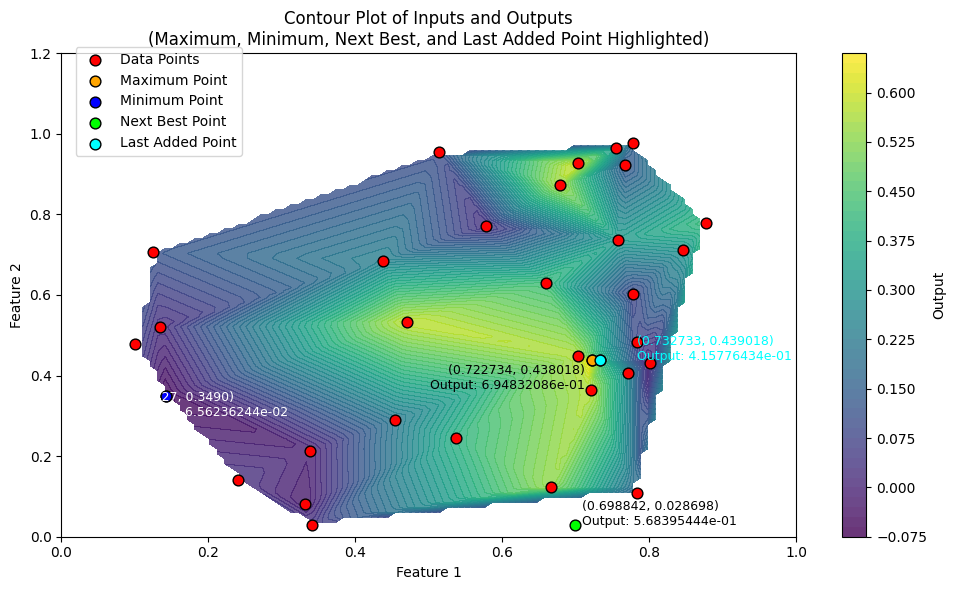

Maximum Value: 6.94832086e-01 at (x1=0.7227, x2=0.438018)
Minimum Value: -6.56236244e-02 at (x1=0.1427, x2=0.349005)
Next Best Point (MACE): 5.68395444e-01 at (x1=0.698842, x2=0.028698)
Last Added Point: 4.15776434e-01 at (x1=0.732733, x2=0.439018)


In [3]:

import numpy as np
from scipy.stats import norm
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from scipy.interpolate import griddata
from pymoo.core.problem import Problem
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, RationalQuadratic, WhiteKernel, RBF

class HEBOOptimizer:
    def __init__(self, bounds, initial_X=None, initial_y=None,
                 beta=2.5, xi=1.0, epsilon=0.1, random_state=None, noise_factor=0.01):

        self.bounds = np.array(bounds)
        self.dim = len(bounds)
        self.beta = beta
        self.xi = xi
        self.epsilon = epsilon
        self.rng = np.random.RandomState(random_state)
        
        # Initialize data storage
        self.X = initial_X 
        self.y = initial_y 
        noise_level = max(noise_factor * np.var(x_final), 1e-8)
        # Configure GP kernel
        self.kernel = C(1.0) * Matern([0.2, 1e8], nu=1.5, length_scale_bounds=(1e-8, 10)) \
              + WhiteKernel(6.845797612820619e-05, noise_level_bounds=(1e-8, 1))
        
    def _fit_gp(self, kernel=None):
        if kernel is None:
            kernel = self.kernel  # n_restarts_optimizer=10,
        gp = GaussianProcessRegressor(kernel=kernel, normalize_y=False,
            random_state=self.rng
        )
        gp.fit(self.X, self.y)
        return gp



    def _stochastic_mean(self, mu, noise_var):
        """HEBO's noise-adjusted mean"""
        return mu + self.xi * noise_var

    def _mace_optimization(self, gp):
        """Core MACE multi-acquisition optimization"""
        class MACEProblem(Problem):
            def __init__(self, gp, bounds, best, beta, xi):
                super().__init__(n_var=len(bounds), n_obj=3,
                                xl=[b[0] for b in bounds], xu=[b[1] for b in bounds])
                self.gp = gp
                self.best = best
                self.beta = beta
                self.xi = xi

            def _evaluate(self, X, out, *args, **kwargs):
                mu, sigma = self.gp.predict(X, return_std=True)
                
                # Correct way to access noise level
                noise_var = self.gp.kernel_.get_params().get('k2__noise_level', 1e-9)
                
                mu_adj = mu + self.xi * noise_var  # HEBO's stochastic mean
                
                # Calculate acquisition functions
                sigma = np.maximum(sigma, 1e-9)  # Avoid divide by zero
                Z = (mu_adj - self.best) / sigma
                
                ei = (mu_adj - self.best) * norm.cdf(Z) + sigma * norm.pdf(Z)
                pi = norm.cdf(Z)
                ucb = mu_adj + self.beta * sigma
                
                # Minimize [-EI, -PI, UCB]
                out["F"] = np.column_stack([-ei, -pi, ucb])

        if len(self.y) == 0:
            return self._random_sample()
        
        problem = MACEProblem(gp, self.bounds, np.max(self.y), self.beta, self.xi)
        algorithm = NSGA2(pop_size=50, eliminate_duplicates=True)
        res = minimize(problem, algorithm, ("n_gen", 100), verbose=False)
        
        if res.X.size == 0:
            return self._random_sample()
        
        # Select best candidate from Pareto front (maximize EI)
        return res.X[np.argmax(-res.F[:, 0])]

    def _random_sample(self):
        """Generate random sample within bounds"""
        return np.array([self.rng.uniform(low, high) for (low, high) in self.bounds]).reshape(1, -1)

    def suggest_next_point(self):
        """Returns next candidate point for evaluation (maximization)"""
        # Epsilon-greedy exploration
        if self.rng.rand() < self.epsilon:
            return self._random_sample()
        # Fit GP with current data
        gp = self._fit_gp()
        # Run MACE optimization
        candidate = self._mace_optimization(gp)
        
        # Ensure candidate is within bounds
        return np.clip(candidate, self.bounds[:, 0], self.bounds[:, 1])

    def update_data(self, X_new, y_new):
        """Update observed data with new point(s)"""
        self.X = np.vstack([self.X, np.atleast_2d(X_new)])
        self.y = np.concatenate([self.y, np.atleast_1d(y_new)])
    

def get_bayesian_bounds(x_final):
    """
    Given a 2D array x_final (N rows, d features),
    returns a list of (min, max) tuples for each feature 
    to serve as bounds in Bayesian optimization.
    """
    min_vals = np.min(x_final, axis=0)
    max_vals = np.max(x_final, axis=0)
    return [(low, high) for low, high in zip(min_vals, max_vals)]
bounds = get_bayesian_bounds(x_final)

hebo = HEBOOptimizer(
    bounds=bounds,
    initial_X=x_final,
    initial_y=y_final,
    beta = 1,      # Controls exploration in UCB: Higher β explores more, Lower β exploits more
    xi = 0.01, # Increases exploration in noisy areas, expanding search range# Adjusts the stochastic mean: Higher ξ favors noisier, uncertain regions
    epsilon = 0.08 # # Exploration probabiselflity: Higher ε increases random sampling
)

# 3. Get next candidate point
next_point = hebo.suggest_next_point().flatten()
#next_point = hebo.suggest_next_point().reshape(-1)

# next z is predicited value at the inputs found from nextpoint, we use gausian
# process that we had trained above 
next_z = hebo._fit_gp().predict(next_point.reshape(1, -1))[0]
print(f"Next point to evaluate: {next_point}")


#---------------------------- VISUALISATION---------------------------
x = x_final[:, 0]
y = x_final[:, 1]
z = y_final.ravel()

# Define grid for contour plot
grid_x, grid_y = np.mgrid[0:1:100j, 0:1.2:100j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')  # Safer than 'cubic'

# Find min/max points
max_idx = np.argmax(z)
max_x, max_y, max_z = x[max_idx], y[max_idx], z[max_idx]
min_idx = np.argmin(z)
min_x, min_y, min_z = x[min_idx], y[min_idx], z[min_idx]
last_x, last_y, last_z = x[-1], y[-1], z[-1]

# Create figure
plt.figure(figsize=(10, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, levels=60, cmap='viridis', alpha=0.8)
plt.colorbar(label="Output")
s = 60  # Point size

# Plot data points
plt.scatter(x, y, color='red', label="Data Points", edgecolor='black', s=s)
plt.scatter(max_x, max_y, color='orange', edgecolor='black', s=s, label="Maximum Point")
plt.text(
    max_x - 0.01,  # Move left
    max_y - 0.01,  # Move down
    f"({max_x:.6}, {max_y:.6f})\nOutput: {max_z:.8e}",
    color='black',
    fontsize=9,
    ha='right',  # Align text to the right of the new position
    va='top'  # Align text to the top of the new position
)

plt.scatter(min_x, min_y, color='blue', edgecolor='black', s=s, label="Minimum Point")
plt.text(min_x - 0.05, min_y - 0.05, f"({min_x:.4f}, {min_y:.4f})\nOutput: {min_z:.8e}", color='white', fontsize=9)

# Plot next best acquisition point
plt.scatter(next_point[0], next_point[1], color='lime', edgecolor='black', s=s, label="Next Best Point")
plt.text(
    next_point[0] + 0.01, next_point[1],
    f"({next_point[0]:.6f}, {next_point[1]:.6f})\nOutput: {next_z:.8e}",
    color='black',
    fontsize=9
)

# Plot last added point
plt.scatter(last_x, last_y, color='cyan', edgecolor='black', s=s, label="Last Added Point")
plt.text(
    last_x + 0.05, last_y,
    f"({last_x:.6f}, {last_y:.6f})\nOutput: {last_z:.8e}",
    color='cyan',
    fontsize=9
)

# Final plot settings
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Contour Plot of Inputs and Outputs\n(Maximum, Minimum, Next Best, and Last Added Point Highlighted)")
plt.legend(loc='center left', bbox_to_anchor=(0.01, 0.9))
plt.tight_layout()
plt.show()

# Print information about the points
print(f"Maximum Value: {max_z:.8e} at (x1={max_x:.4f}, x2={max_y:.6f})")
print(f"Minimum Value: {min_z:.8e} at (x1={min_x:.4f}, x2={min_y:.6f})")
print(f"Next Best Point (MACE): {next_z:.8e} at (x1={next_point[0]:.6f}, x2={next_point[1]:.6f})")
print(f"Last Added Point: {last_z:.8e} at (x1={last_x:.6f}, x2={last_y:.6f})")


In [68]:
def kumaraswamy_inverse_warp(Y, a, b):
    return (1 - (1 - Y) ** (1/b)) ** (1/a)

next_point_original = kumaraswamy_inverse_warp(np.array(next_point), a=0.411047, b=0.468162)

# Format output as x1-x2 with 6 decimals
formatted_output = f"{next_point_original[0]:.6f}-{next_point_original[1]:.6f}"
print(formatted_output)


0.777789-0.601875


- Below I am trying to pass a new kernel to the above hebo class instance in order to check how the visualisation changes, it seems that to exploit is coming handy the embeded kernel, and probarly to explore local optima is test_kernel 

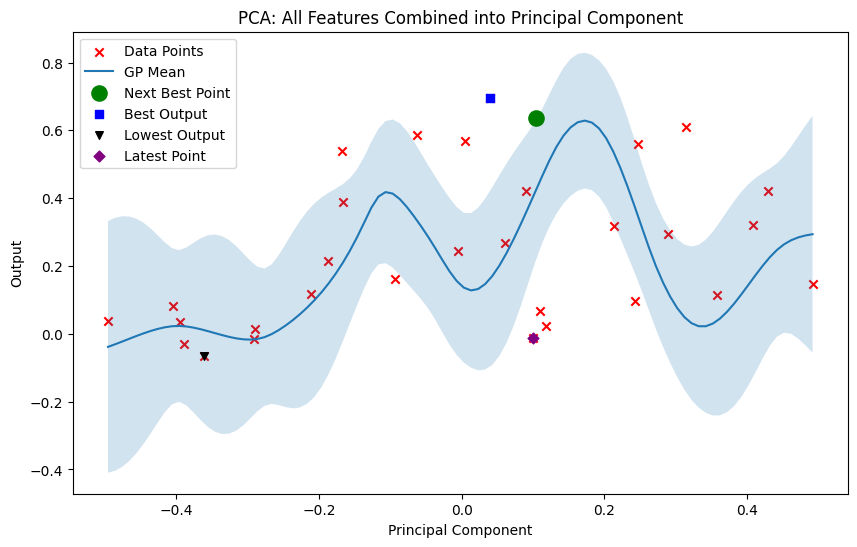

Next best point (2D): [0.66269673 0.54231085]
Predicted value at next best point: 0.636787966782633
Best output point: [0.68050446 0.43808974], Value: 0.694832085790191
Lowest output point: [0.15482778 0.38030338], Value: -0.065623624437337
Latest point: [0.77295274 0.43408564], Value: -0.012770848572528


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ConstantKernel as C

# Reduce to 1D using PCA
pca = PCA(n_components=1)
t_data = pca.fit_transform(x_final).ravel()
t_next = pca.transform(next_point.reshape(1, -1)).item()

# Define grid along PCA component
t_values = np.linspace(t_data.min(), t_data.max(), 100)
X_plot = pca.inverse_transform(t_values.reshape(-1, 1))


# Fit GP model
gp = hebo._fit_gp()  

# Get predictions
mean_pred, std_pred = gp.predict(X_plot, return_std=True)

# Find the best, lowest, and latest points
best_idx = np.argmax(y_final)  # Highest output
low_idx = np.argmin(y_final)   # Lowest output
latest_idx = -1                # Last added point

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(t_data, y_final, color='red', marker='x', label='Data Points')
plt.plot(t_values, mean_pred, label='GP Mean')
plt.fill_between(t_values, mean_pred - 1.96 * std_pred, mean_pred + 1.96 * std_pred, alpha=0.2)

# Plot next best point
plt.scatter(t_next, gp.predict(next_point.reshape(1, -1))[0], color='green', s=120, marker='o', label='Next Best Point')

# Highlight special points
plt.scatter(t_data[best_idx], y_final[best_idx], color='blue', s=30, marker='s', label='Best Output')   # Best
plt.scatter(t_data[low_idx], y_final[low_idx], color='black', s=30, marker='v', label='Lowest Output')   # Lowest
plt.scatter(t_data[latest_idx], y_final[latest_idx], color='purple', s=30, marker='D', label='Latest Point')  # Latest

plt.title('PCA: All Features Combined into Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Output')
plt.legend()
plt.show()
# Print key points
print("Next best point (2D):", next_point)
print(f"Predicted value at next best point: {gp.predict(next_point.reshape(1, -1))[0]:.15f}")

# Ensure all values are scalars before formatting
print(f"Best output point: {x_final[best_idx]}, Value: {y_final[best_idx].item():.15f}")
print(f"Lowest output point: {x_final[low_idx]}, Value: {y_final[low_idx].item():.15f}")
print(f"Latest point: {x_final[latest_idx]}, Value: {y_final[latest_idx].item():.15f}")



In [65]:
len(f1_inp)


30

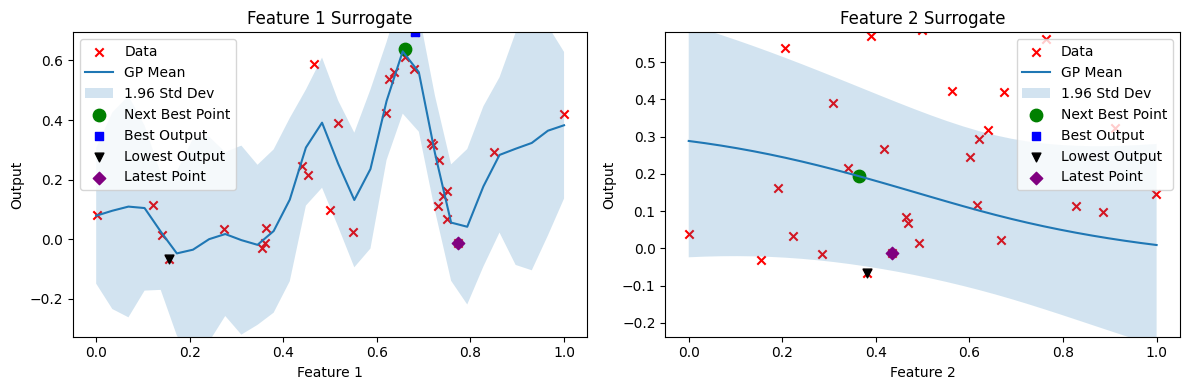

Best output point: [0.6805044557436526, 0.4380897431666143], Value: 0.694832085790191
Lowest output point: [0.15482778033403477, 0.3803033830661482], Value: -0.065623624437337
Latest point: [0.7729527414294126, 0.43408564416169604], Value: -0.012770848572528


In [66]:


import numpy as np
import matplotlib.pyplot as plt

def plot_gp_slices_clamped(hebo, f1_inp, f1_out, beta=1.96, n_points=100, kernel=None):
    """
    Plots 1D slices of the Gaussian Process model learned by HEBO.
    Each plot represents how the function behaves for a single feature while 
    holding other features constant at their mean values.
    """
    
    # Fit the GP model from HEBO
    gp = hebo._fit_gp(kernel=kernel)

    # Get next best point from HEBO
    next_point = hebo.suggest_next_point().flatten()

    # Means of other features
    means_other_features = np.mean(f1_inp, axis=0)

    # Full-dimensional prediction of the next point
    next_mean, next_std = gp.predict(next_point.reshape(1, -1), return_std=True)
    n_features = f1_inp.shape[1]

    # Find key points: Best, Lowest, and Latest
    best_idx = np.argmax(f1_out)   # Highest output
    low_idx = np.argmin(f1_out)    # Lowest output
    latest_idx = -1                # Last added point

    # Determine subplot grid
    n_cols = 2 if n_features > 1 else 1
    n_rows = int(np.ceil(n_features / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axes = np.atleast_1d(axes)  # Ensure it's always an array

    for i in range(n_features):
        ax = axes[i]

        # Build 1D grid for feature i
        grid = np.linspace(0, 1, n_points)
        X_plot = np.tile(means_other_features, (n_points, 1))
        X_plot[:, i] = grid

        # Predict on the grid
        mean_pred, std_pred = gp.predict(X_plot, return_std=True)

        # Observed data for this feature
        y_data = f1_out
        x_feat = f1_inp[:, i]

        # Posterior confidence band
        y_pred_lower = mean_pred - beta * std_pred
        y_pred_upper = mean_pred + beta * std_pred

        # Next best point on this feature slice
        X_next = means_other_features.copy()
        X_next[i] = next_point[i]
        y_next_dim = gp.predict(X_next.reshape(1, -1))[0]

        # Collect values for robust percentile-based y-axis clamping
       # Ensure y_data is 1D before concatenation
        y_all = np.concatenate([y_data.ravel(), y_pred_lower, y_pred_upper, [y_next_dim]])

        y_low, y_high = np.percentile(y_all, [2, 95])  # Clamping y-limits

        # Plot observed data points
        ax.scatter(x_feat, y_data, color='red', marker='x', label='Data')

        # Plot posterior mean prediction
        ax.plot(grid, mean_pred, label='GP Mean')

        # Plot confidence band
        ax.fill_between(grid, y_pred_lower, y_pred_upper, alpha=0.2, label=f'{beta} Std Dev')

        # Mark next best point
        ax.scatter(next_point[i], y_next_dim, color='green', s=80, marker='o', label='Next Best Point')

        # Mark best, lowest, and latest points
        ax.scatter(f1_inp[best_idx, i], f1_out[best_idx], color='blue', s=40, marker='s', label='Best Output')
        ax.scatter(f1_inp[low_idx, i], f1_out[low_idx], color='black', s=40, marker='v', label='Lowest Output')
        ax.scatter(f1_inp[latest_idx, i], f1_out[latest_idx], color='purple', s=40, marker='D', label='Latest Point')

        ax.set_title(f'Feature {i+1} Surrogate')
        ax.set_xlabel(f'Feature {i+1}')
        ax.set_ylabel('Output')
        ax.legend()
        ax.set_ylim([y_low, y_high])  # Apply clamping

    # Hide any extra subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Print next best point details
    print(f"Best output point: {f1_inp[best_idx].tolist()}, Value: {f1_out[best_idx].item():.15f}")
    print(f"Lowest output point: {f1_inp[low_idx].tolist()}, Value: {f1_out[low_idx].item():.15f}")
    print(f"Latest point: {f1_inp[latest_idx].tolist()}, Value: {f1_out[latest_idx].item():.15f}")


# ✅ **Now call the function with HEBO**
plot_gp_slices_clamped(hebo, x_final, y_final, beta=1.96, n_points=30)


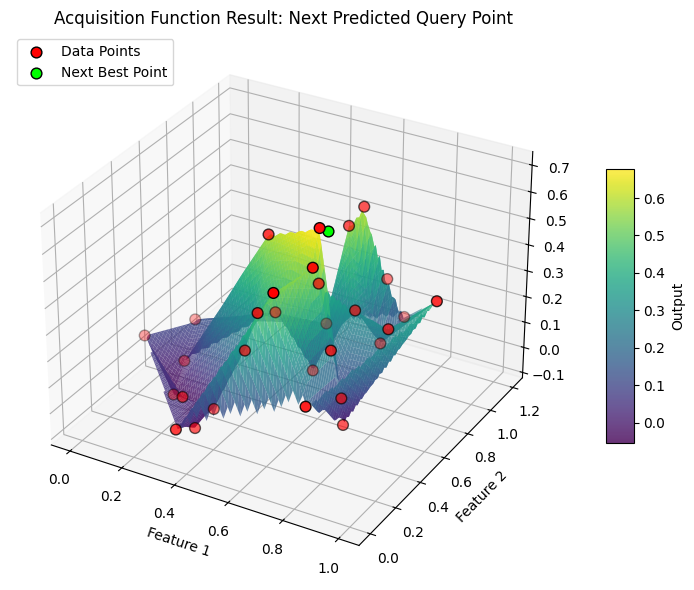

Next Best Point (WPI): at (x1=0.662697, x2=0.542311)


In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D projection

fig = plt.figure(figsize=(10, 6), facecolor='white')
ax = fig.add_subplot(111, projection='3d')

# Surface with fine resolution and smoother appearance
surf = ax.plot_surface(
    grid_x, grid_y, grid_z,
    cmap='viridis', alpha=0.8, edgecolor='none', rcount=100, ccount=100
)

# Colorbar
cb = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cb.set_label("Output")

# Scatter points
ax.scatter(x, y, z, color='red', edgecolor='black', s=60, label="Data Points")
#ax.scatter(max_x, max_y, max_z, color='orange', edgecolor='black', s=60, label="Maximum Point")
#ax.scatter(min_x, min_y, min_z, color='blue', edgecolor='black', s=60, label="Minimum Point")
ax.scatter(next_point[0], next_point[1], next_z, color='lime', edgecolor='black', s=60, label="Next Best Point")

# Labels
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
# ax.set_zlabel("Output")
ax.set_title("Acquisition Function Result: Next Predicted Query Point", loc="center")



# Custom viewing angle and legend~
ax.view_init(elev=30, azim=-60)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
print(f"Next Best Point (WPI): at (x1={next_point[0]:.6f}, x2={next_point[1]:.6f})")

